# Lab 4: Single Layer Perceptron and Multi-Layer Perceptron

### Name: Anuj Raval
### USN: 1AUA23BCS012 from B1

### TASK 1 — Single Layer Perceptron

#### a. Setup Python Environment

In [49]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

#### b. Define Perceptron Function

In [50]:
def train_perceptron(X, y, lr=0.1, epochs=20):

    w = np.zeros(X.shape[1])
    b = 0

    for epoch in range(epochs):

        for i in range(len(X)):

            z = np.dot(w, X[i]) + b

            y_pred = 1 if z >= 0 else 0

            error = y[i] - y_pred

            w += lr * error * X[i]
            b += lr * error

    return w, b

In [51]:
def predict_perceptron(X, w, b):

    preds = []

    for x in X:
        z = np.dot(w, x) + b
        preds.append(1 if z >= 0 else 0)

    return np.array(preds)

#### c. Generate Synthetic Training Data

In [52]:
# Class 1 (positive region)
class1 = np.array([
    [2,2],[3,2],[2,3],[3,3],[4,3],
    [3,4],[4,4],[5,4],[4,5],[5,5],
    [6,5],[5,6],[6,6],[7,6],[6,7],
    [7,7],[8,7],[7,8],[8,8],[9,8]
])

# Class 0 (negative region)
class0 = np.array([
    [-2,-2],[-3,-2],[-2,-3],[-3,-3],[-4,-3],
    [-3,-4],[-4,-4],[-5,-4],[-4,-5],[-5,-5],
    [-6,-5],[-5,-6],[-6,-6],[-7,-6],[-6,-7],
    [-7,-7],[-8,-7],[-7,-8],[-8,-8],[-9,-8]
])

X_linear = np.vstack((class1, class0))

y_linear = np.array([1]*20 + [0]*20)

#### d. Train with Perceptron Learning Rul

In [53]:
w, b = train_perceptron(X_linear, y_linear)

pred = predict_perceptron(X_linear, w, b)

print("Perceptron Accuracy:",
      np.mean(pred == y_linear))

print("Weights:", w)
print("Bias:", b)

Perceptron Accuracy: 1.0
Weights: [0.2 0.2]
Bias: -0.1


#### e. Visualize Decision Boundary

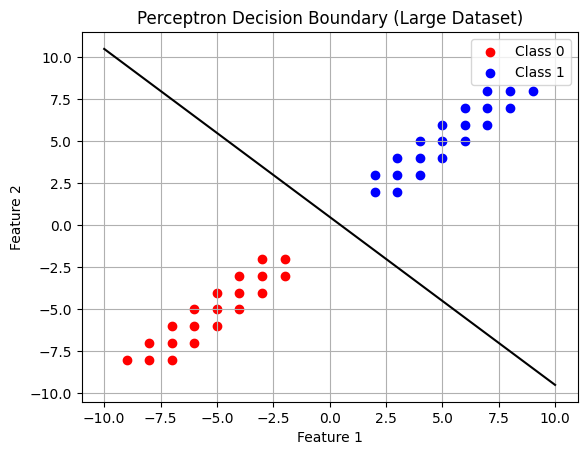

In [54]:
plt.scatter(class0[:,0], class0[:,1],
            color="red", label="Class 0")

plt.scatter(class1[:,0], class1[:,1],
            color="blue", label="Class 1")

x_vals = np.linspace(-10,10,200)

y_vals = -(w[0]*x_vals + b)/w[1]

plt.plot(x_vals, y_vals, color="black")

plt.title("Perceptron Decision Boundary (Large Dataset)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()
plt.grid(True)

plt.show()

### TASK 2 — Multi-Layer Perceptron

#### a. Define Network Architecture Dataset (XOR)

In [55]:
X_xor = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_xor = np.array([0,1,1,0]).reshape(-1,1)

#### b. Define Activation Functions

In [56]:
def relu(x):
    return np.maximum(0,x)

def relu_derivative(x):
    return (x>0).astype(float)

def sigmoid(x):
    return 1/(1+np.exp(-x))

#### c. Initialize Weights & Biases

In [57]:
def initialize(hidden_size=4):

    W1 = np.random.randn(2,hidden_size)
    b1 = np.zeros((1,hidden_size))

    W2 = np.random.randn(hidden_size,1)
    b2 = np.zeros((1,1))

    return W1,b1,W2,b2

#### d. Train with Backpropagation

In [58]:
def train_mlp(X,y,hidden_size=4,
              epochs=5000,lr=0.1):

    W1,b1,W2,b2 = initialize(hidden_size)

    losses=[]

    for epoch in range(epochs):

        # forward
        z1 = X@W1 + b1
        a1 = relu(z1)

        z2 = a1@W2 + b2
        y_hat = sigmoid(z2)

        loss = np.mean((y-y_hat)**2)
        losses.append(loss)

        # backward
        dz2 = (y_hat-y)*y_hat*(1-y_hat)

        dW2 = a1.T@dz2
        db2 = np.sum(dz2,axis=0)

        dz1 = dz2@W2.T*relu_derivative(z1)

        dW1 = X.T@dz1
        db1 = np.sum(dz1,axis=0)

        # update
        W1 -= lr*dW1
        b1 -= lr*db1

        W2 -= lr*dW2
        b2 -= lr*db2

    return W1,b1,W2,b2,losses

#### e. Evaluate Model

In [59]:
def predict_mlp(X,W1,b1,W2,b2):

    a1 = relu(X@W1 + b1)
    y_hat = sigmoid(a1@W2 + b2)

    return (y_hat>0.5).astype(int)

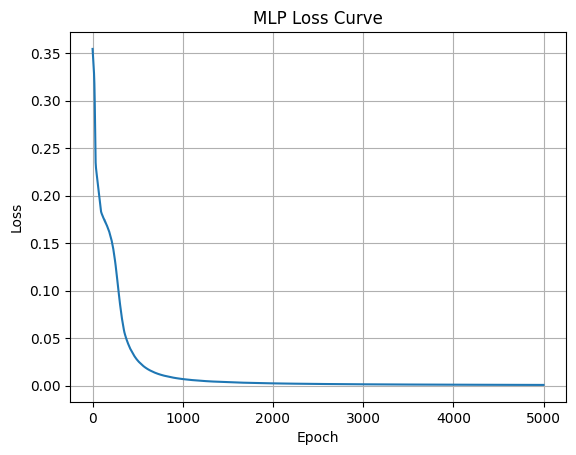

In [60]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MLP Loss Curve")
plt.grid(True)
plt.show()



In [61]:
# Train MLP:
W1,b1,W2,b2,losses = train_mlp(X_xor,y_xor)

pred = predict_mlp(X_xor,W1,b1,W2,b2)

print("MLP Accuracy (XOR):",
      np.mean(pred==y_xor))

MLP Accuracy (XOR): 1.0


### TASK 3 — Comparison

#### 1. Compare Perceptron vs MLP

In [62]:
w_xor,b_xor = train_perceptron(X_xor,y_xor.flatten())

pred = predict_perceptron(X_xor,w_xor,b_xor)

print("Perceptron Accuracy (XOR):",
      np.mean(pred==y_xor.flatten()))

Perceptron Accuracy (XOR): 0.5


#### MLP on Linear data:

In [63]:
W1,b1,W2,b2,_ = train_mlp(X_linear,
                          y_linear.reshape(-1,1))

pred = predict_mlp(X_linear,W1,b1,W2,b2)

print("MLP Accuracy (Linear):",
      np.mean(pred==y_linear.reshape(-1,1)))

MLP Accuracy (Linear): 1.0


#### 2. Explore Hidden Layer Size

In [64]:
for size in [2,4,8]:

    W1,b1,W2,b2,_ = train_mlp(X_xor,
                              y_xor,
                              hidden_size=size)

    pred = predict_mlp(X_xor,W1,b1,W2,b2)

    acc = np.mean(pred==y_xor)

    print("Hidden Size:",
          size,
          "Accuracy:",
          acc)

Hidden Size: 2 Accuracy: 0.25
Hidden Size: 4 Accuracy: 1.0
Hidden Size: 8 Accuracy: 1.0


#### 3. Plot Loss vs Epoch

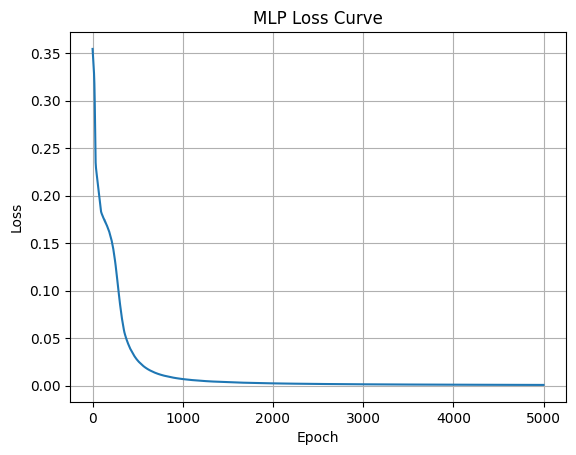

In [65]:
plt.plot(losses)

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.title("MLP Loss Curve")

plt.grid(True)

plt.show()